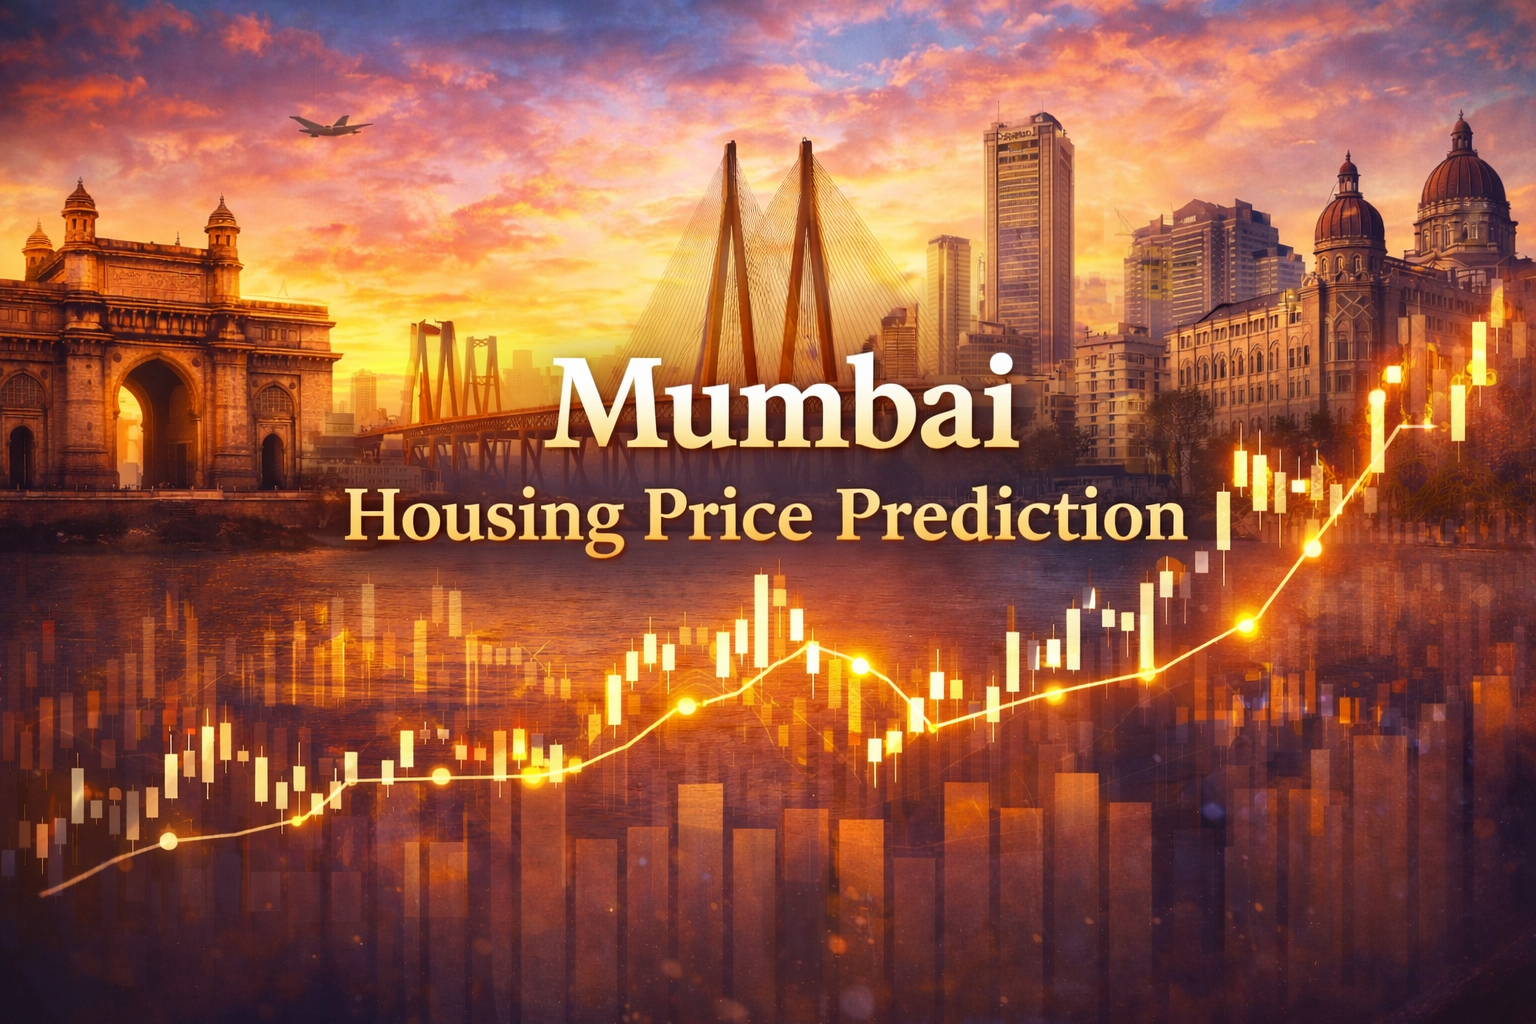

In [1]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/mumbai-skyline/Mumbai skyline at sunset with graph.png'))

# **Importing Dependencies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# **Importing data**

In [3]:
df = pd.read_csv('/kaggle/input/mumbai-housing-price/mumbai_housing_prices.csv')

In [4]:
df.head()

,Area,Year,Price_per_sqm_Local,Size_sqm,Bedrooms,Total_Price_Local
0,Andheri,2020,163782,139,2,22765698
1,Andheri,2021,214723,71,4,15245333
2,Bandra,2019,349044,218,5,76091592
3,Colaba,2021,296588,152,6,45081376
4,Colaba,2025,371440,203,6,75402320


In [5]:
df.describe()

,Year,Price_per_sqm_Local,Size_sqm,Bedrooms,Total_Price_Local
count,230.000000,230.000000,230.000000,230.000000,2.300000e+02
mean,2021.573913,254248.317391,199.691304,3.678261,4.970744e+07
std,2.256716,114592.966597,86.229942,1.731031,3.120160e+07
min,2018.000000,61473.000000,52.000000,1.000000,4.237740e+06
25%,2020.000000,148763.000000,133.000000,2.000000,2.417536e+07
50%,2022.000000,253256.000000,200.000000,4.000000,4.249382e+07
75%,2023.000000,349692.000000,270.000000,5.000000,6.904998e+07
max,2025.000000,449914.000000,350.000000,6.000000,1.527591e+08


# **Splitting data**

In [6]:
X = df.drop(['Total_Price_Local', 'Area'], axis=1)
y = df['Total_Price_Local']

In [7]:
print(X)
print(y)

     Year  Price_per_sqm_Local  Size_sqm  Bedrooms
0    2020               163782       139         2
1    2021               214723        71         4
2    2019               349044       218         5
3    2021               296588       152         6
4    2025               371440       203         6
..    ...                  ...       ...       ...
225  2018               401501        52         5
226  2022                69648       183         3
227  2020               307841       234         4
228  2025               377224       257         6
229  2022               337092       158         1

[230 rows x 4 columns]
0      22765698
1      15245333
2      76091592
3      45081376
4      75402320
         ...   
225    20878052
226    12745584
227    72034794
228    96946568
229    53260536
Name: Total_Price_Local, Length: 230, dtype: int64


In [8]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [9]:
print(X.shape, X_train.shape, X_test.shape)

(230, 4) (184, 4) (46, 4)


# **Model Training**

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

# **Evaluation**

In [12]:
training_data_pred = model.predict(X_train)

In [13]:
print(training_data_pred)

[ 6.83613009e+07  7.24213784e+07  6.57210706e+07  4.62449379e+07
  2.46023125e+07  2.34051429e+06  3.16723884e+07  4.90182418e+07
  1.99795788e+07  5.60056222e+07  5.50801648e+07  3.08632914e+07
  4.42361757e+07  3.56355961e+07  9.16098185e+07  4.54834312e+07
  7.34619279e+06  9.44666891e+07  1.64218112e+07  5.84065444e+07
  8.99146406e+07  5.30786380e+07  2.21224782e+07  9.70604805e+07
  6.87627620e+07  1.66787488e+07  9.76992469e+06  6.37361093e+07
  1.01480297e+07  6.49327530e+07  2.19348083e+07  1.29346250e+07
  8.49063033e+07  2.19403647e+07  8.43813063e+07  2.07987402e+07
  4.40102864e+07  9.54320397e+07  5.25264166e+07  7.51598650e+07
  2.36149351e+07  6.01964212e+07  4.18232185e+07  3.88583257e+07
  7.14163186e+07  5.40961587e+07  1.48268127e+07 -5.42430553e+06
  4.67450212e+07  8.54181290e+07  6.50308676e+07  5.73408443e+07
  7.13434444e+07  3.34509857e+07  3.25670119e+07 -2.78482192e+06
  3.78196388e+07 -4.90206446e+05  5.36299535e+07  3.66337787e+07
  7.43516072e+07  2.41871

In [14]:
#R squared error
score_1 = metrics.r2_score(y_train, training_data_pred)

print("R squared error: ", score_1)


R squared error:  0.8996939689622532


# **Visualizing actual prices and predicted prices (Training)**

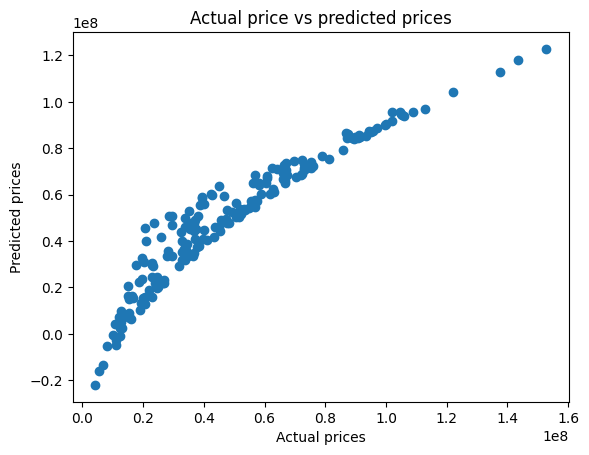

In [15]:
plt.scatter(y_train, training_data_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual price vs predicted prices')
plt.show()

# **Prediction on test data**

In [16]:
test_data_pred = model.predict(X_test)

In [17]:
#R squared error
score_1 = metrics.r2_score(y_test, test_data_pred)

print("R squared error: ", score_1)

R squared error:  0.9130961888607034


# **Visualizing actual prices and predicted prices (Testing)**

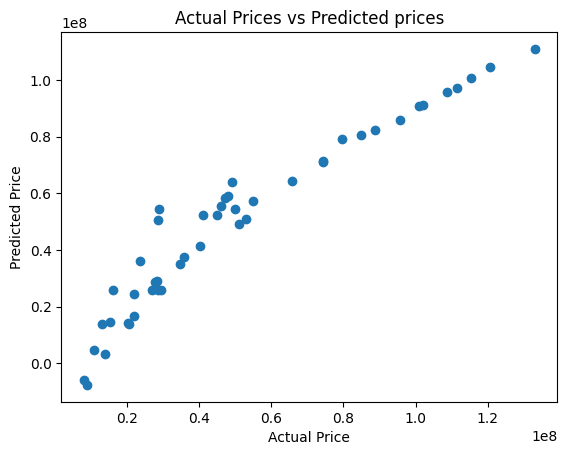

In [18]:
plt.scatter(y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted prices")
plt.show()